In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap



def loadnpz(name, allow_pickle=False):

    #This simple function more easily loads in compressed numpy files.

    if allow_pickle:
        data = np.load(name, allow_pickle=True)
    else:
        data = np.load(name)
    data = data.f.arr_0
    return data






def hapPlotter(bins, chr, predCNA):
    shape1 = predCNA.shape

    predCNA = predCNA.reshape((predCNA.shape[0]*predCNA.shape[1], 2))
    argBad = np.argwhere(np.sum(predCNA, axis=1) > 6)[:, 0]
    predCNA[argBad, 0] = 6
    predCNA[argBad, 1] = 0

    predCNA = [(v[0], v[1]) for v in predCNA]
    predCNA = list(predCNA)


    avail = [(t - i, i) for t in range(7) for i in reversed(range(t+1)) if i <= t - i]
    order = (lambda p : (max(p), min(p)))
    convert = (lambda p : order(p) if sum(p) <= 6 else min(avail, key=(lambda x : abs(p[0] - x[0]) + abs(p[1] - x[1]))))

    predCNA = [convert(v) for v in predCNA]


    set1 = set(predCNA)
    found = [v for v in avail if v in set1]


    smap = {v : x for x, v in enumerate(found)}
    predCNA = [smap[v] for v in predCNA]



    palette = {}
    palette.update({(0, 0) : 'darkblue'})
    palette.update({(1, 0) : 'lightblue'})
    palette.update({(1, 1) : 'lightgray', (2, 0) : 'dimgray'})
    palette.update({(2, 1) : 'lightgoldenrodyellow', (3, 0) : 'gold'})
    palette.update({(2, 2) : 'navajowhite', (3, 1) : 'orange', (4, 0) : 'darkorange'})
    palette.update({(3, 2) : 'salmon', (4, 1) : 'red', (5, 0) : 'darkred'})
    palette.update({(3, 3) : 'plum', (4, 2) : 'orchid', (5, 1) : 'purple', (6, 0) : 'indigo'})
    colors = [palette[c] for c in found]
    cmap = LinearSegmentedColormap.from_list('multi-level', colors, len(colors))


    predCNA = np.array(predCNA).reshape((shape1[0], shape1[1]))


    predCNA = predCNA[:, bins]
    chr = chr[bins]


    chr_palette = ['#525252', '#969696', '#cccccc']
    chr_colors = [ chr_palette[chr[a]%3] for a in range(chr.shape[0])  ]


    g = sns.clustermap( predCNA, col_cluster=False, row_cluster=True, linewidths=0.0, cmap=cmap, cbar_pos=None, yticklabels=False, xticklabels=False, col_colors=chr_colors)


    corners = []
    prev = 0

    for a in range(chr.shape[0]-1):
        if chr[a] != chr[a+1]:
            corners.append((a, a+1))
    corners.append((chr.shape[0]-1, chr.shape[0]))

    ax = g.ax_heatmap

    ticks = []
    for o in corners:
        ax.set_xticks(np.append(ax.get_xticks(), int(float(o[1] + o[0] + 1) / 2.0)))
        ticks.append(chr[o[0]]+1)


    ax.set_xticklabels(ticks, rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)



    plt.tight_layout()
    #plt.show()

    #imageFileName = './images/' + folder1 + '_heatmap.pdf'
    imageFileName = './ACTheatmap.png'
    plt.savefig(imageFileName)





/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


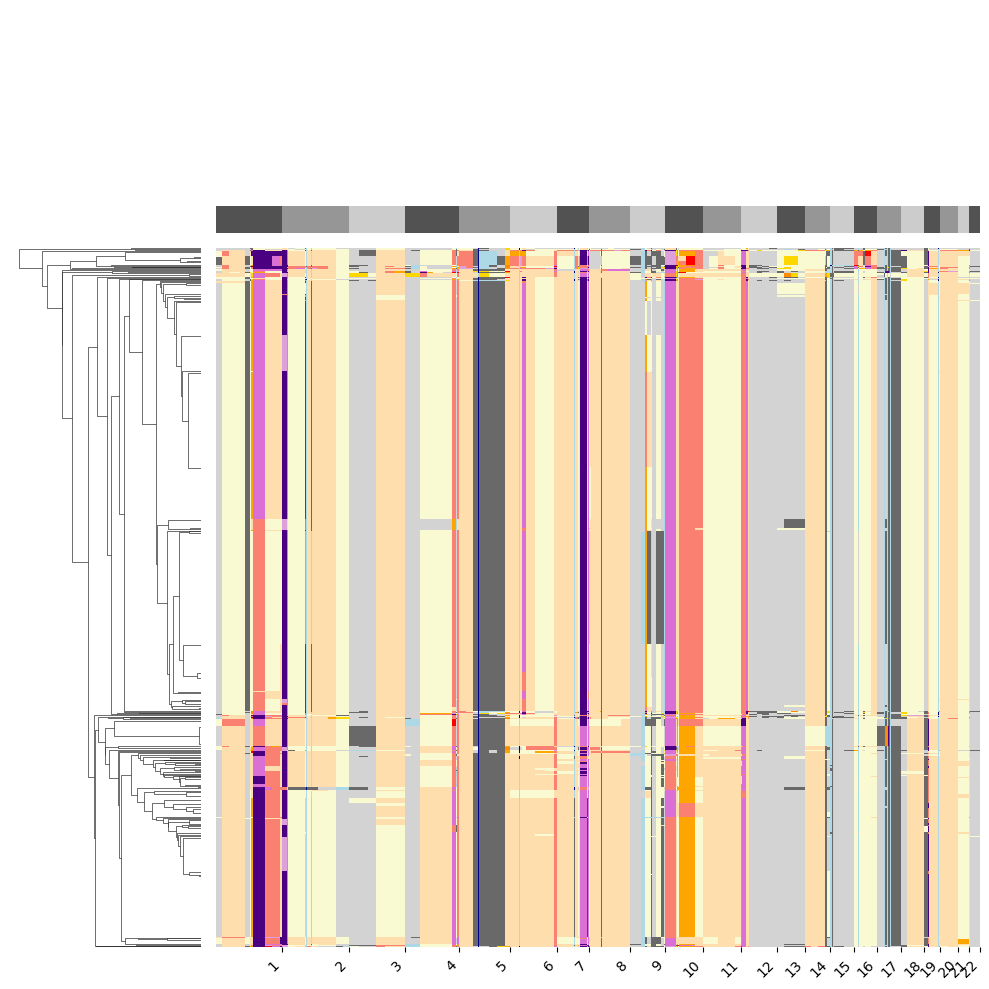

In [5]:
bins = loadnpz('./bins.npz')
chr = loadnpz('./chr_avg.npz')
predCNA = loadnpz('./pred_now.npz')
hapPlotter(bins, chr, predCNA)

In [23]:

!python3 -m pip install PyQt5==5.11.3
!python3 -m pip install --user PyQt5 ete3

3.10.4 (v3.10.4:9d38120e33, Mar 23 2022, 17:29:05) [Clang 13.0.0 (clang-1300.0.29.30)]
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 33.3 MB/s eta 0:00:0000:0100:01
ERROR: Could not find a version that satisfies the requirement PyQt5_sip<4.20,>=4.19.11 (from pyqt5) (from versions: 12.7.0, 12.7.1, 12.7.2, 12.8.0, 12.8.1, 12.9.0, 12.9.1, 12.10.1, 12.11.0, 12.11.1, 12.12.0, 12.12.1, 12.12.2, 12.13.0)
ERROR: No matching distribution found for PyQt5_sip<4.20,>=4.19.11


In [2]:

#import ete3
#import PyQt5
#ete3.__file__
#from ete3 import Tree, TreeStyle, NodeStyle, TextFace

In [3]:


import ete3
import matplotlib.pyplot as plt
import numpy as np
from ete3 import Tree#, TreeStyle
from ete3 import TreeStyle


def simplifyClonesTree(tree1):

      def getSmallClade(tree1, startPos):
          finalPair = []
          lastPos = -1
          #for a in range(startPos, len(tree1)):
          a = startPos
          while (len(finalPair) == 0) and (a < len(tree1)):
              if tree1[a] in ['(', ')']:

                  if lastPos != -1:
                      if (tree1[lastPos] == '(') and (tree1[a] == ')'):
                          finalPair = [lastPos, a]

                  lastPos = a
              a += 1
          return finalPair


      #pairOld = [-1, -1]

      startPos = 0
      pairNew = [-2, -2]
      while len(pairNew) > 0:#pairOld[0]!=pairNew[0]:

          #pairOld = pairNew
          pairNew = getSmallClade(tree1, startPos)

          #print (pairNew)

          if len(pairNew) > 0:




              pairNow_str = tree1[pairNew[0]+1:  pairNew[1] ]
              pairNow = pairNow_str.split(',')

              #print (pairNow)
              #quit()

              value1 = float(pairNow[0].split(':')[1])
              value2 = float(pairNow[1].split(':')[1])
              if value1 + value2 == 0:

                  leaf1 = pairNow[0].split(':')[0]
                  #leaf2 = int(pairNow2[1].split(':')[0])

                  pairNow_str = '(' + pairNow_str + ')'

                  tree1 = tree1.replace(pairNow_str, leaf1)

              else:

                  startPos = pairNew[0] + 1
                  #print ("keep")

      #print (tree1)
      #quit()
      return tree1

def plottree(tree1):




    tree1 = tree1 + ';'

    tree1 = tree1.replace('root', '')

    tree1 = simplifyClonesTree(tree1)



    t = Tree(tree1)
    
    ts = TreeStyle()
    ts.show_leaf_name = False
    ts.rotation = 90    
    ts.min_leaf_separation = 0
    ts.branch_vertical_margin = 0
    t.show(tree_style=ts)


tree1 = loadnpz('treeWithLength.npz')[0]
plottree(tree1)


2023-11-15 12:29:15.376 Python[30552:10592586] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/4b/2_93ghl974x2ljkb20yrfczh0000gn/T/org.python.python.savedState


: 